# Load csv file

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris ##
import os
from sklearn.metrics import classification_report,accuracy_score
import glob
import shutil
import os.path
import fnmatch
import dlib
from keras.preprocessing import image
import cv2

Using TensorFlow backend.


In [3]:
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm

In [17]:
os.chdir=("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba")
print(os.path.abspath(os.chdir))
basedir = ("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba")
print(os.path.abspath(basedir))

/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba
/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba


In [18]:
os.chdir=("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba")

#basedir = os.path.abspath(os.curdir)

images_dir = os.path.join(basedir,'img')
# for item in os.listdir(images_dir):
#     if not item.startswith('.') and os.path.isfile(os.path.join(images_dir, item)):
#         print(len(image_paths))
#         print(image_paths)



#labels = os.path.join(basedir,'labels.csv')
labels = ("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/labels.csv")
print(os.path.abspath(basedir))
#/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/labels.csv

/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba


In [19]:
df = pd.read_csv(os.path.abspath(labels))
df = pd.DataFrame(df).reset_index()
df.columns = ['Index','Total']
del df['Index']
df["Index"] = df["Total"].str.split("\t").str[0]
df["img_name"] = df["Total"].str.split("\t").str[1]
df["gender"] = df["Total"].str.split("\t").str[2]
df["smiling"] = df["Total"].str.split("\t").str[3]
del df['Total']
del df['Index']

df.to_csv('/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/celeb_labels.csv', index=False)
labels_filename = os.path.join(basedir,'celeb_labels.csv')
df

,img_name,gender,smiling
0,0.jpg,-1,1
1,1.jpg,-1,1
2,2.jpg,1,-1
3,3.jpg,-1,-1
4,4.jpg,-1,-1
...,...,...,...
4995,4995.jpg,1,1
4996,4996.jpg,1,1
4997,4997.jpg,1,1
4998,4998.jpg,1,1


In [20]:
# Smiling (1), Not Smiling (-1)

celeb_smile = df.loc[df['smiling'] == '1']
smile_img = celeb_smile[['img_name']]
smile_img.shape

(2500, 1)

In [21]:
celeb_no_smile= df.loc[df['smiling'] == '-1']
no_smile_img = celeb_no_smile[['img_name']]
no_smile_img.shape

(2500, 1)

In [32]:
os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba"
src = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba"
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/smiling")
dst_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/smiling"

names_smile = smile_img.img_name.tolist()

for filename in os.listdir(src):
    for name in names_smile:
        if name == filename:
             # move the file
            shutil.copy2("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/"+filename, dst_smile)
            break
            
            
            

In [33]:
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/NotSmiling")
dst_no_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

names_no_smile = no_smile_img.img_name.tolist()

for filename in os.listdir(src):
    for name in names_no_smile:
        if name == filename:
             # move the file
            shutil.copy2("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/"+filename, dst_no_smile)
            break
            
            

## Split the data


In [59]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [63]:
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/train")
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/train/smiling")
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/train/NotSmiling")

#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/test")
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/test/smiling")
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/test/NotSmiling")

#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/validation")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/validation/smiling")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/validation/NotSmiling")


In [67]:
os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

src_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/smiling"
src_no_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

#allFileNames_smile=[os.path.join(src_smile, l) for l in os.listdir(src_smile) if not l.endswith('.DS_Store')]
allFileNames_smile = os.listdir(src_smile)





In [69]:
# os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

# src_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/smiling"
# src_no_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

# #allFileNames_smile = os.listdir(src_smile)
# allFileNames_smile=[os.path.join(src_smile, l) for l in os.listdir(src_smile) if not l.endswith('.DS_Store')]


np.random.shuffle(allFileNames_smile)
train, valid, test = np.split(np.array(allFileNames_smile),[int(len(allFileNames_smile)*0.7), int(len(allFileNames_smile)*0.85)])

train_smile = [src_smile+'/'+ name for name in train.tolist()]
val_smile = [src_smile+'/' + name for name in valid.tolist()]
test_smile = [src_smile+'/' + name for name in test.tolist()]

print('Total images: ', len(allFileNames_smile))
print('Training: ', len(train))
print('Validation: ', len(valid))
print('Testing: ', len(test))

# Copy-pasting images
for name in train_smile:
    shutil.copy2(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/train/smiling")

for name in val_smile:
    shutil.copy2(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/validation/smiling")

for name in test_smile:
    shutil.copy2(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/test/smiling")

Total images:  2500
Training:  1750
Validation:  375
Testing:  375


In [70]:
os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

src_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/smiling"
src_no_smile = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/img/NotSmiling"

allFileNames_no_smile = os.listdir(src_no_smile)
np.random.shuffle(allFileNames_no_smile)
train, valid, test = np.split(np.array(allFileNames_no_smile),[int(len(allFileNames_no_smile)*0.7), int(len(allFileNames_no_smile)*0.85)])

train_no_smile = [src_no_smile+'/'+ name for name in train.tolist()]
val_no_smile = [src_no_smile+'/' + name for name in valid.tolist()]
test_no_smile = [src_no_smile+'/' + name for name in test.tolist()]

print('Total images: ', len(allFileNames_no_smile))
print('Training: ', len(train))
print('Validation: ', len(valid))
print('Testing: ', len(test))

# Copy-pasting images
for name in train_no_smile:
    shutil.copy2(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/train/NotSmiling")

for name in val_no_smile:
    shutil.copy2(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/validation/NotSmiling")

for name in test_no_smile:
    shutil.copy2(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/test/NotSmiling")

Total images:  2500
Training:  1750
Validation:  375
Testing:  375


## Modeling

In [71]:
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

from keras import models

In [72]:
# starting point 
model_emotion= models.Sequential()

# Add first convolutional block
model_emotion.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(128,128,3))) 
## 6464
model_emotion.add(MaxPooling2D((2, 2), padding='same'))

# second block
model_emotion.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_emotion.add(MaxPooling2D((2, 2), padding='same'))
# third block
model_emotion.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_emotion.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
model_emotion.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_emotion.add(MaxPooling2D((2, 2), padding='same'))

# global average pooling
model_emotion.add(GlobalAveragePooling2D())
# fully connected layer
model_emotion.add(Dense(64, activation='relu'))
model_emotion.add(BatchNormalization())
# make predictions
model_emotion.add(Dense(2, activation='sigmoid'))


# Show a summary of the model. Check the number of trainable parameters
model_emotion.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)      

In [73]:
# use early stopping to optimally terminate training through callbacks
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
es_emotion=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# save best model automatically
mc_emotion= ModelCheckpoint('/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/model_emotion.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

cb_list_emotion=[es_emotion,mc_emotion]


# compile model 
model_emotion.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [74]:

from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [75]:
# set up data generator
data_generator_emotion = ImageDataGenerator(preprocessing_function=preprocess_input)

# get batches of training images from the directory
train_generator_emotion = data_generator_emotion.flow_from_directory(
        '/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# get batches of validation images from the directory
validation_generator_emotion = data_generator_emotion.flow_from_directory(
        '/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/celeba/validation',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

history_emotion = model_emotion.fit_generator(
        train_generator_emotion,
        epochs=25,
        steps_per_epoch=train_generator_emotion.samples // 32,
        validation_data=validation_generator_emotion,
        validation_steps=validation_generator_emotion.samples // 32,
        callbacks=cb_list_emotion)

Found 3500 images belonging to 2 classes.
Found 750 images belonging to 2 classes.
Epoch 1/25
109/109 [==============================] - 64s 589ms/step - loss: 0.6950 - accuracy: 0.5345 - val_loss: 0.8957 - val_accuracy: 0.5299

Epoch 00001: val_loss improved from inf to 0.89572, saving model to /Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/model_emotion.h5
Epoch 2/25
109/109 [==============================] - 59s 539ms/step - loss: 0.6841 - accuracy: 0.5594 - val_loss: 0.7759 - val_accuracy: 0.5077

Epoch 00002: val_loss improved from 0.89572 to 0.77593, saving model to /Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/model_emotion.h5
Epoch 3/25
109/109 [==============================] - 54s 492ms/step - loss: 0.6726 - accuracy: 0.5901 - val_loss: 0.7616 - val_accuracy: 0.5216

Epoch 00003: val_loss improved from 0.77593 to 0.76160, saving model to /Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A2/model_emotion.h5
Epoch 4/25
109/109 [==============================] - 54s 496ms/step - l

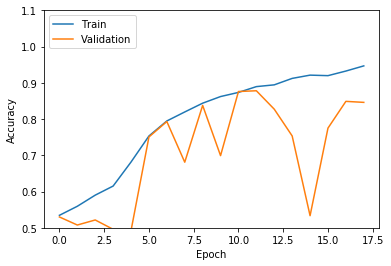

In [76]:
# plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history_emotion.history['accuracy'])
plt.plot(history_emotion.history['val_accuracy'])
plt.ylim([.5,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("model_emotion.png", dpi=300)